# Problem Statement
#### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

#### The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

#### Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

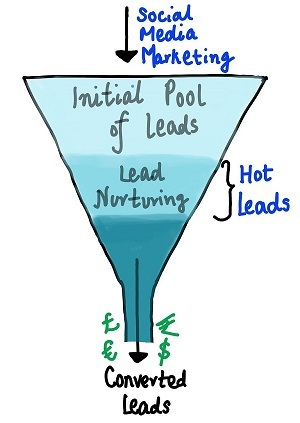

#### As we can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

## Objective:
#### Select the most promising leads, i.e. the leads that are most likely to convert into paying customers.
#### The company requires to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [4]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker
%matplotlib inline

# Model Building libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [7]:
# Read the dataset

# Save it into a dataframe called "leads"
leads = pd.read_csv("Leads.csv")

In [8]:
# Look at the first few entries

# head
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [9]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [10]:
# Inspect the size of the dataset

leads.size

341880

In [11]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
# Check the summary of the dataset

leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [13]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Data Cleaning and Preparation

### Outliers

In [17]:
# before outlier treatment
leads.describe(percentiles=[.10,.25,.50,.75,.95])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
10%    586361.700000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
95%    655404.050000     1.000000    10.000000                  1562.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
10%                0.000000                    13.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
95%                6.000000                    17.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
10%                     15.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
95%                     20.000000  
max                     20.000000

In [18]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

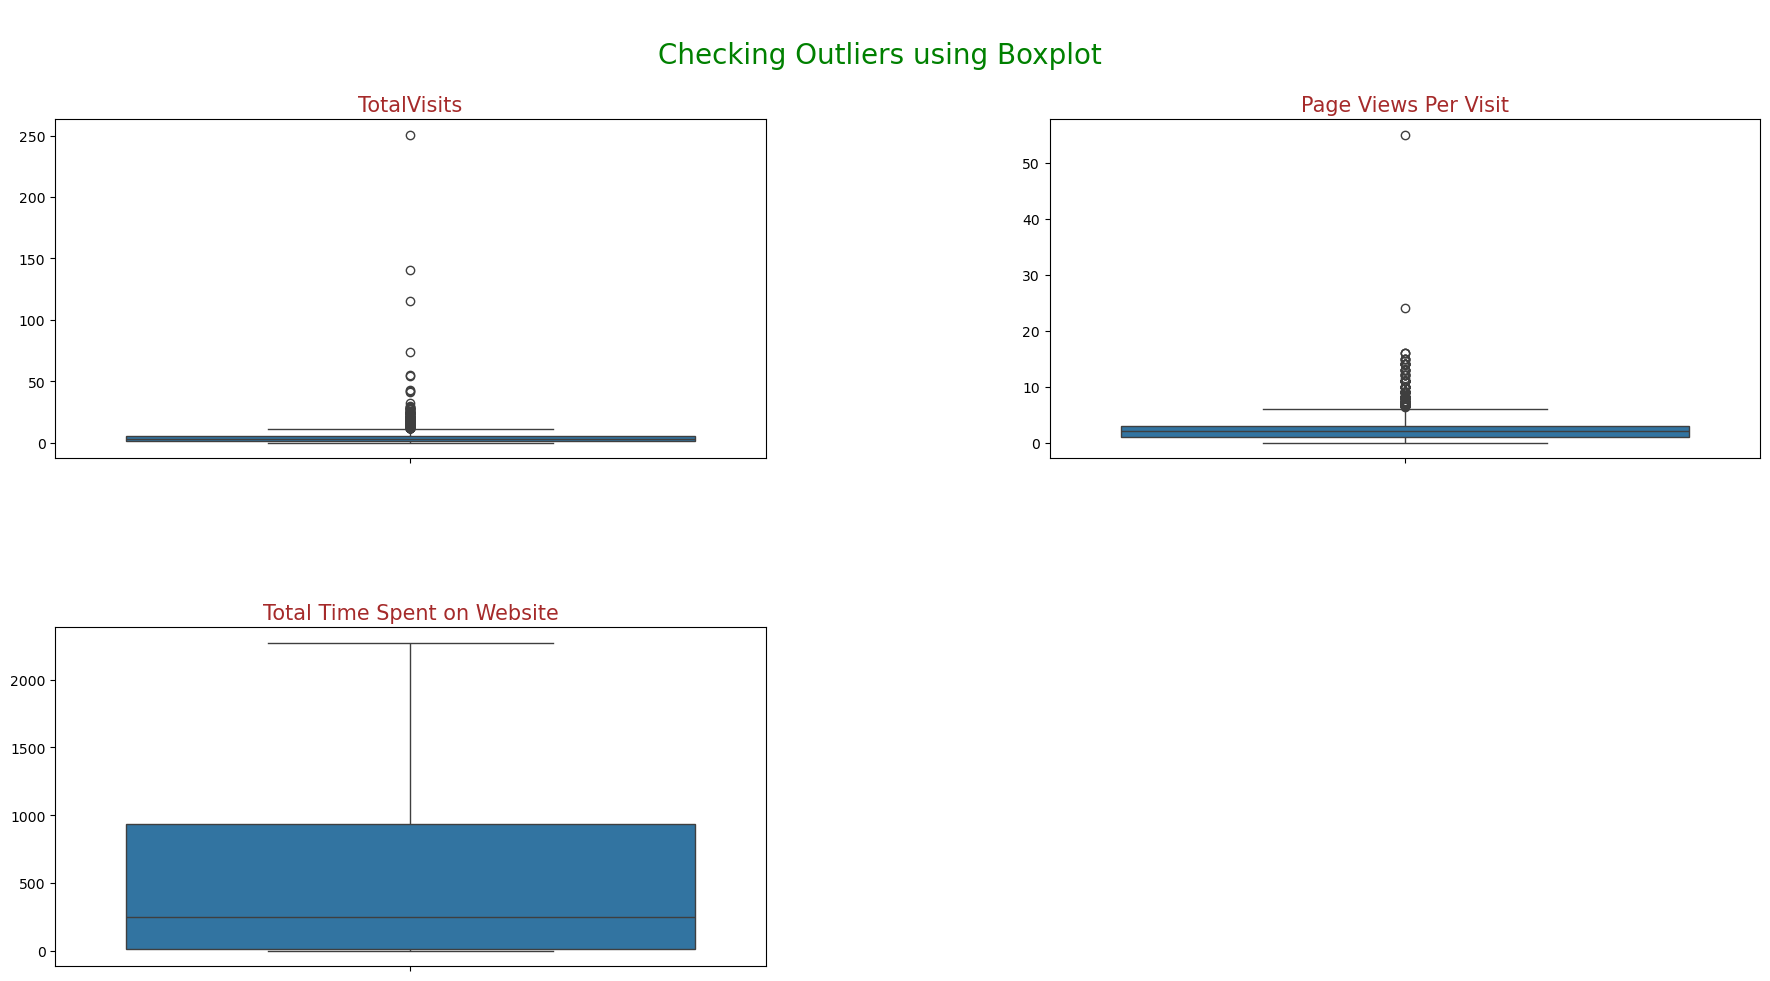

In [19]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(leads,num_cols)

"TotalVisits","Page Views Per Visit":Both these variables contain outliers as can be seen in the boxplot So, These outliers needs to be treated for these variables

In [21]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [22]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(leads,capping_cols)

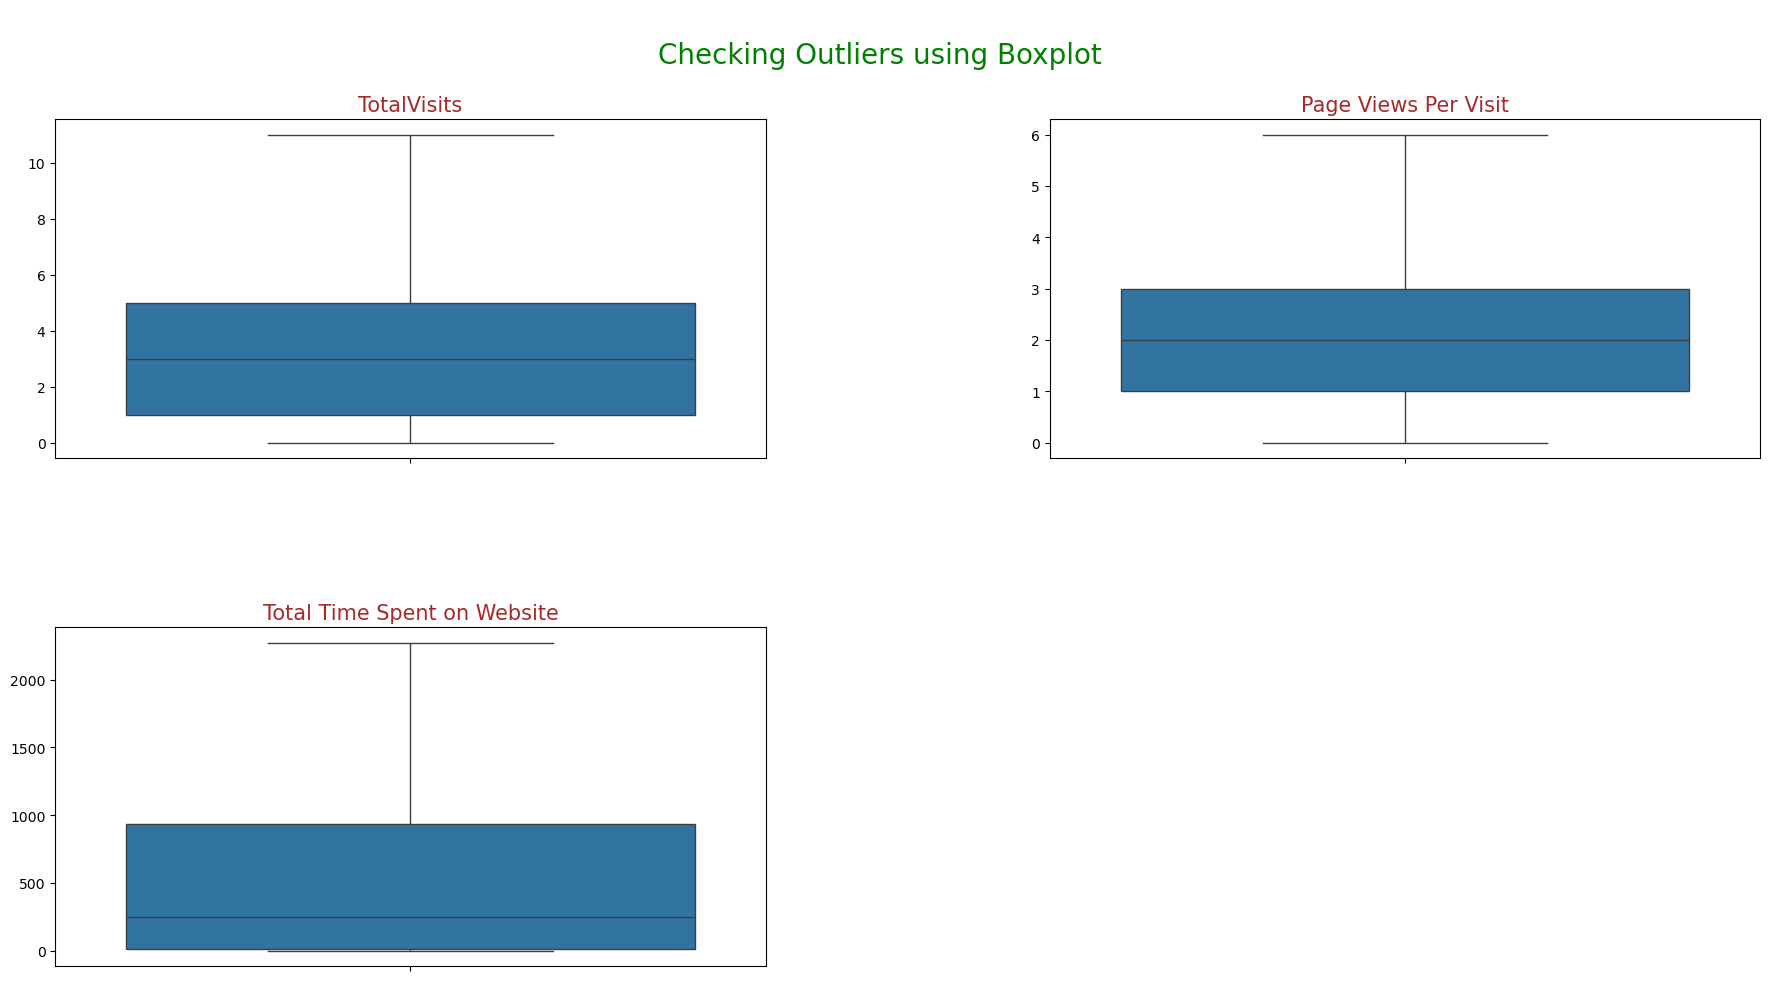

In [23]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(leads,num_cols)

In [24]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [26]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col,axis= 1, inplace=True)

In [27]:
# Check the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [28]:
# Check the number of missing values in each column

leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

As you might be able to interpret, the variable City won't be of any use in our analysis. So it's best that we drop it.

In [30]:
# drop City
leads.drop('City',axis= 1, inplace=True)

In [31]:
# Same goes for the variable 'Country'

# drop Country
leads.drop('Country',axis= 1, inplace=True)

In [32]:
# Now checking the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [33]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

### Visualizing the features with `Select` values

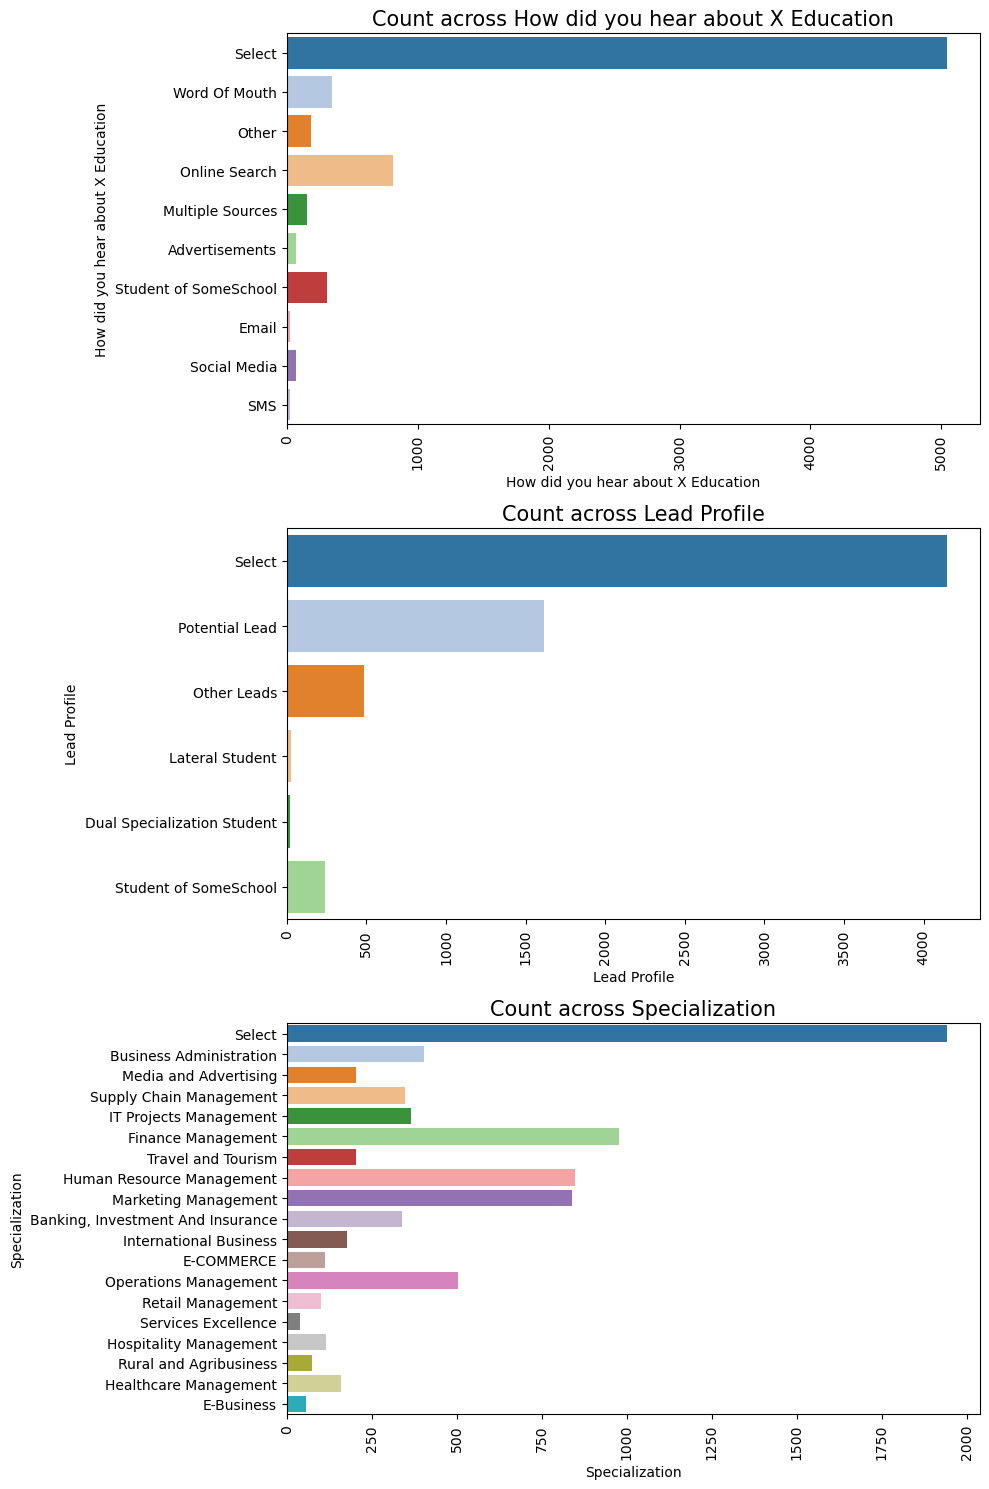

In [35]:
def countplot(x, fig):
    plt.subplot(len(columns), 1, fig) 
    sns.countplot(leads[x], palette='tab20')
    plt.title('Count across ' + x, size=15)
    plt.xlabel(x, size=10)
    plt.xticks(rotation=90)

# List of columns to plot
columns = ['How did you hear about X Education', 'Lead Profile', 'Specialization']

# Create the figure
plt.figure(figsize=(10, 15))  


for i, col in enumerate(columns, 1):
    countplot(col, i)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

There are a few columns in which there is a level called `'Select'` which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [37]:
# checking the value counts of all the columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('-----------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
-----------------------------------------------
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
-----------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--------

The following three columns now have the level 'Select'. Let's check them once again.

In [39]:
leads['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [40]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [41]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

## Visualizing the features

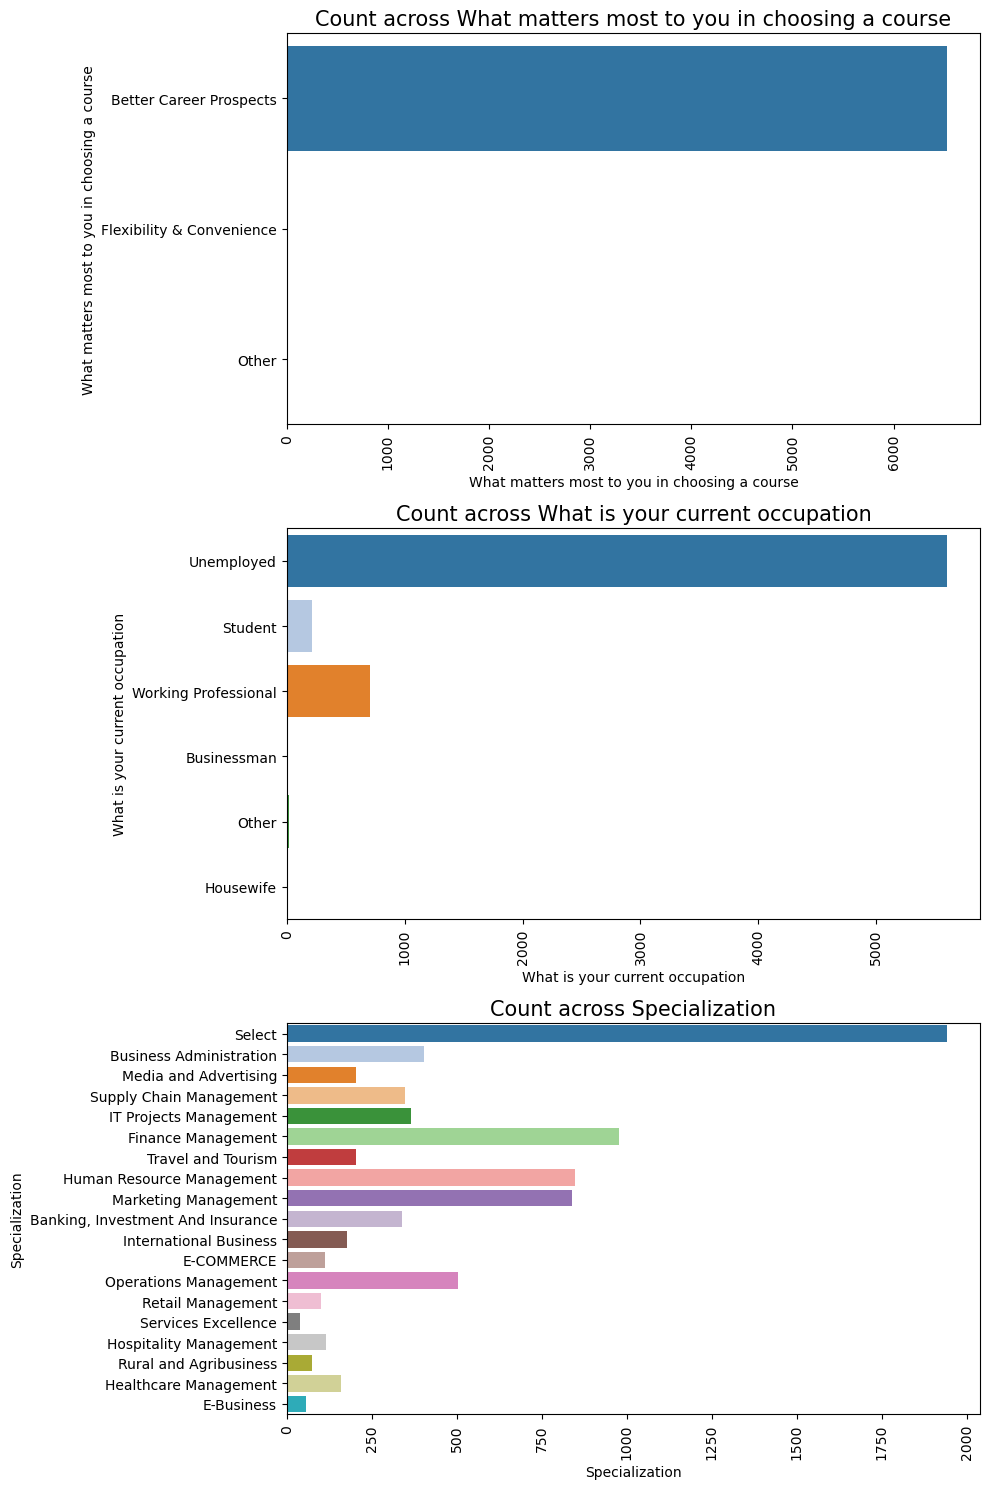

In [43]:
def countplot(x, fig):
    plt.subplot(len(columns), 1, fig)  
    sns.countplot(leads[x], palette='tab20')
    plt.title('Count across ' + x, size=15)
    plt.xlabel(x, size=10)
    plt.xticks(rotation=90)

# List of columns to plot
columns = ['What matters most to you in choosing a course', 
           'What is your current occupation', 
           'Specialization']

# Create the figure
plt.figure(figsize=(10, 15))  

for i, col in enumerate(columns, 1):
    countplot(col, i)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

As it can be seen that the levels of `"Lead Profile"` and `"How did you hear about X Education"` have a lot of rows which have the value Select which is of no use to the analysis

So it's best that we drop them.

In [45]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also we notice that, when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

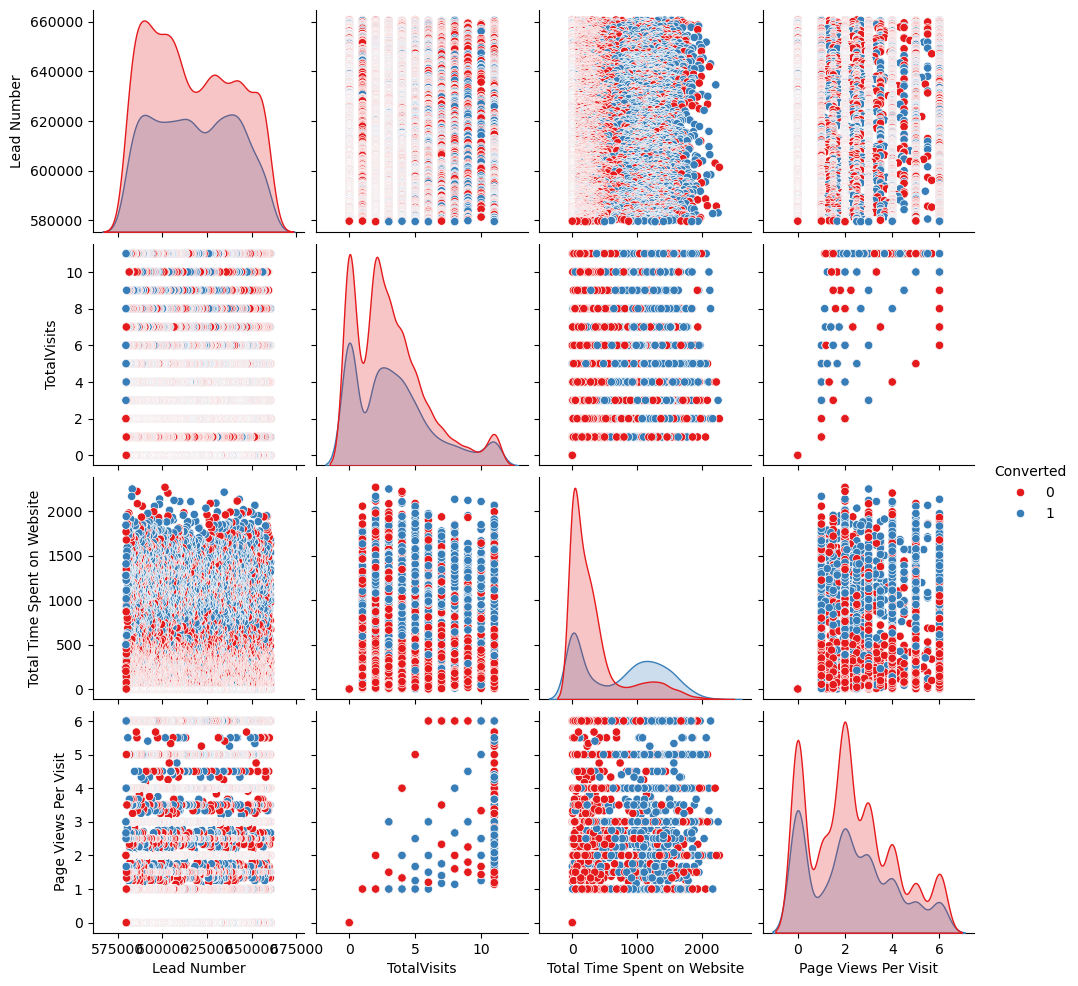

In [47]:
sns.pairplot(leads,diag_kind='kde',hue='Converted',palette='Set1')
plt.show()

In [48]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
X Education Forums                                  0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article                                   0
Magazine                    

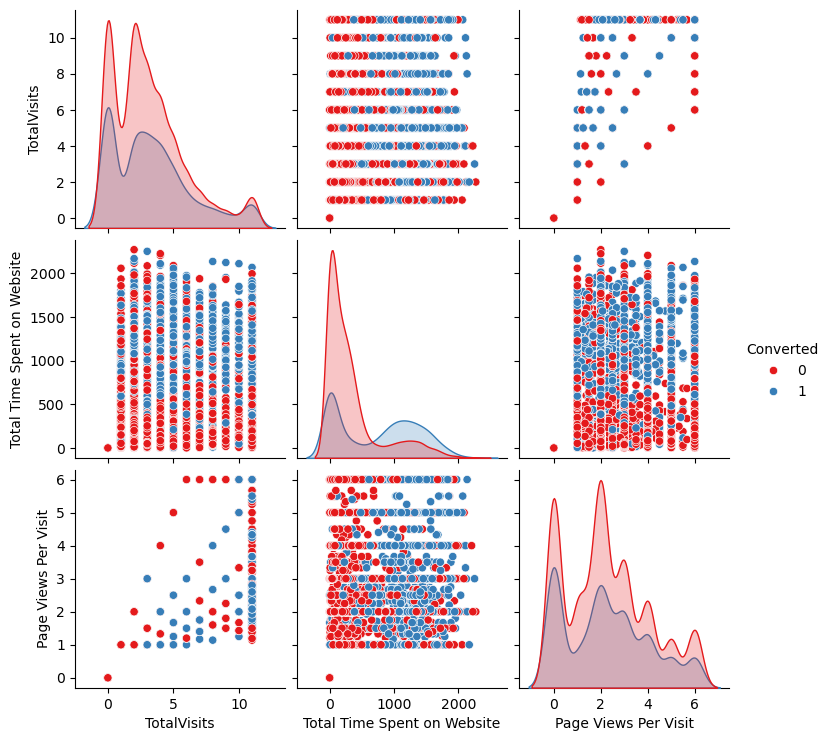

In [49]:
x_edu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted',palette='Set1')
plt.show()

In [50]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Converted
0    -1.438626                    -1.473767             -1.441534  -0.791863
1     0.779032                     0.729628              0.293184  -0.791863
2    -0.194350                     1.306093              0.026919   1.262845
3    -0.692483                     0.264936             -0.595847  -0.791863
4    -0.194350                     1.252499             -0.595847   1.262845

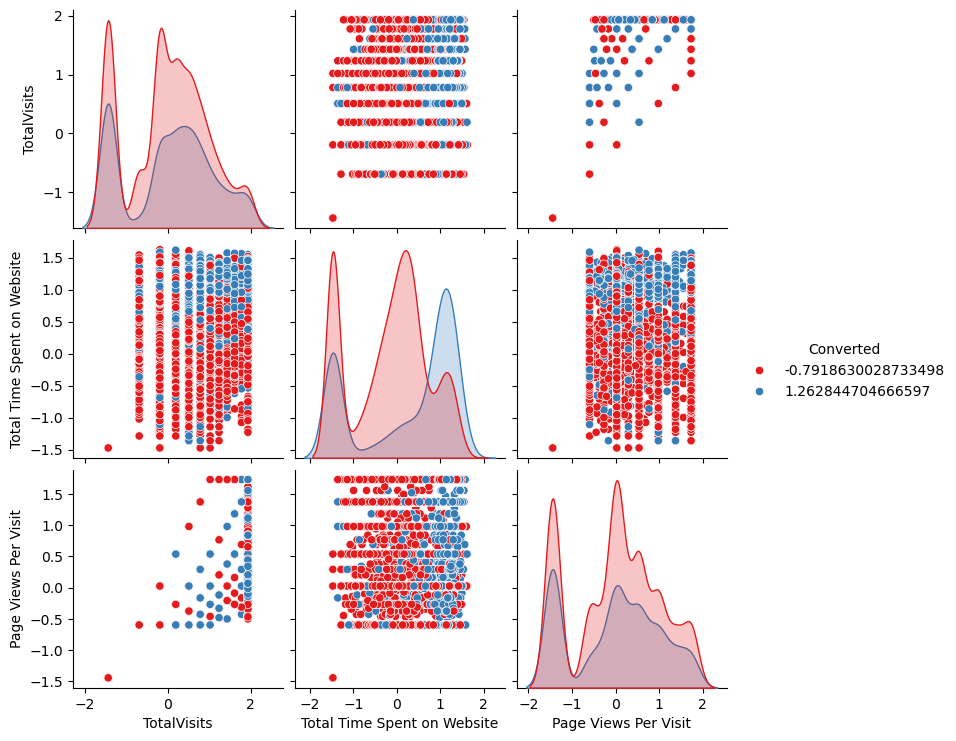

In [51]:
sns.pairplot(transformedx_edu,diag_kind='kde',hue='Converted',palette='Set1')
plt.show()

In [52]:
# Dropping the above columns

leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [53]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [54]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

The variable `What matters most to you in choosing a course` has the `level Better Career Prospects` 6528 times while the other two levels appear once twice and once respectively. 

So we should dropping this column as well.

In [56]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [57]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [58]:
# Checking the number of null values again

leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now, there's the column `What is your current occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [60]:
# Dropping the null values rows in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [61]:
# Convert Prospect ID to numeric for correlation

leads['Prospect ID'] = leads['Prospect ID'].apply(lambda x: float(int(x.replace('-', ''), 16)))

In [62]:
leads_numeric = leads.select_dtypes(include=[np.number])

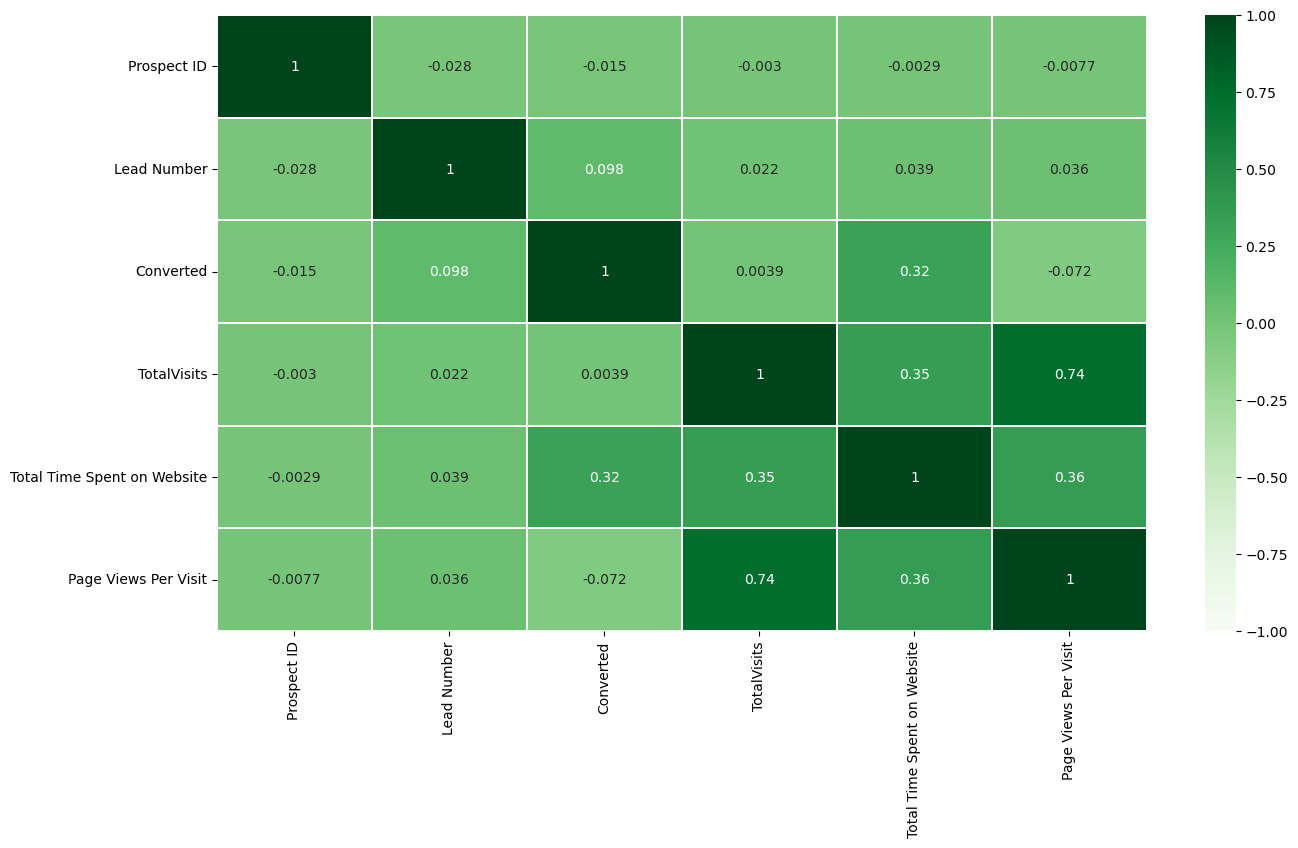

In [63]:
# Observing Correlation
plt.figure(figsize=(15,8))
sns.heatmap(leads_numeric.corr(), annot=True, cmap="Greens", robust=True, linewidth=0.1, vmin=-1)
plt.show()

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

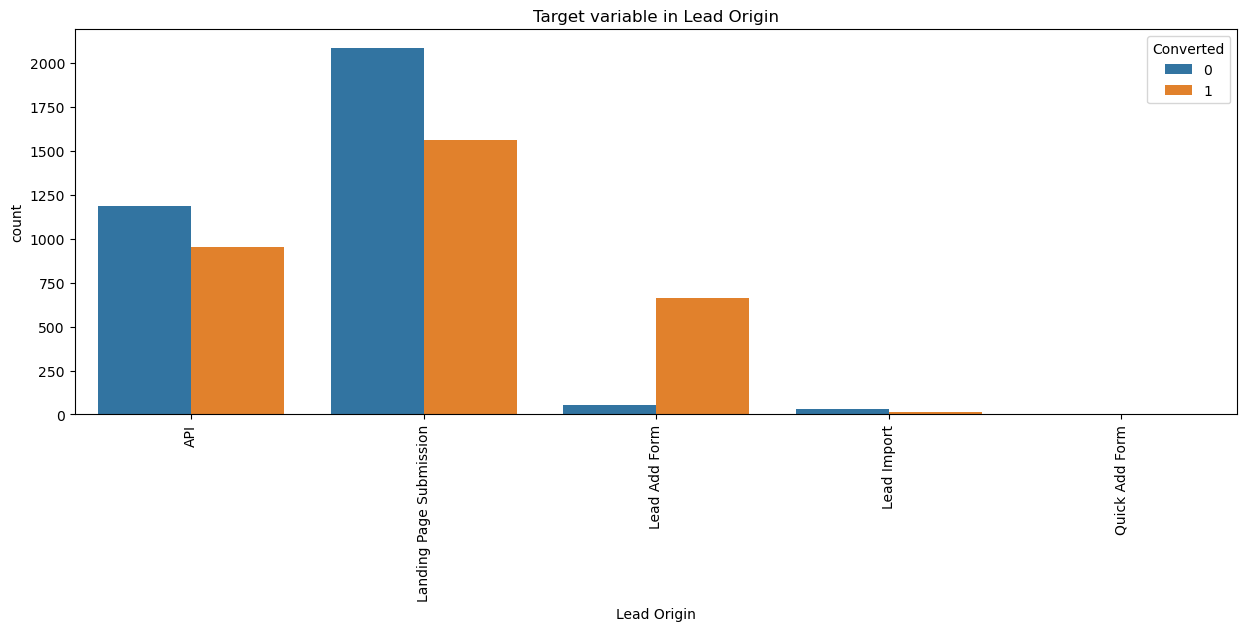

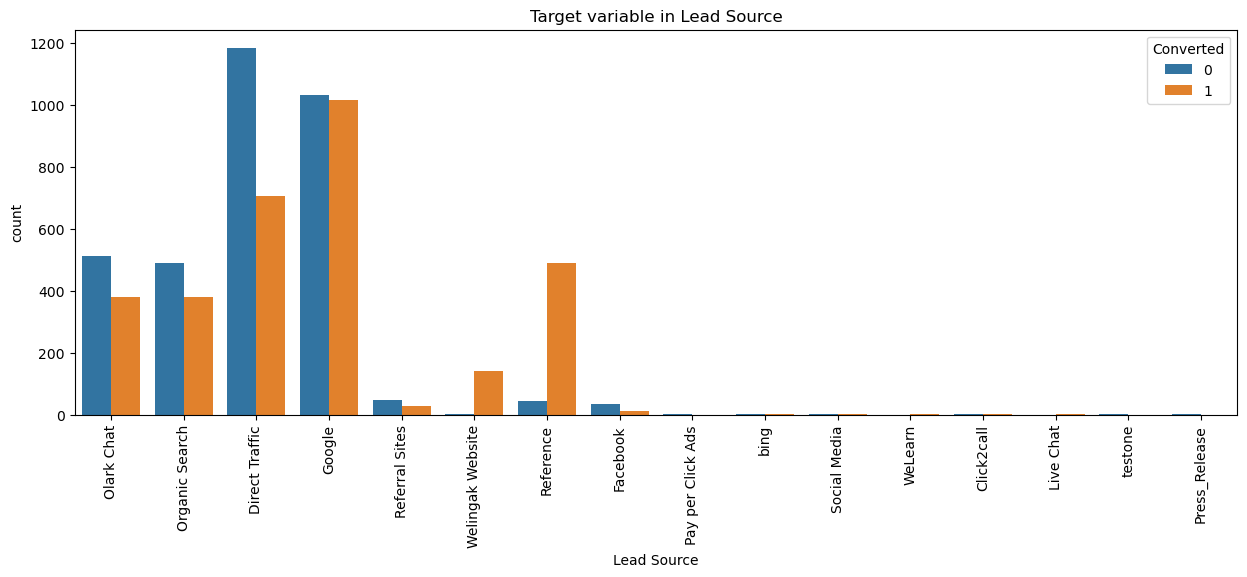

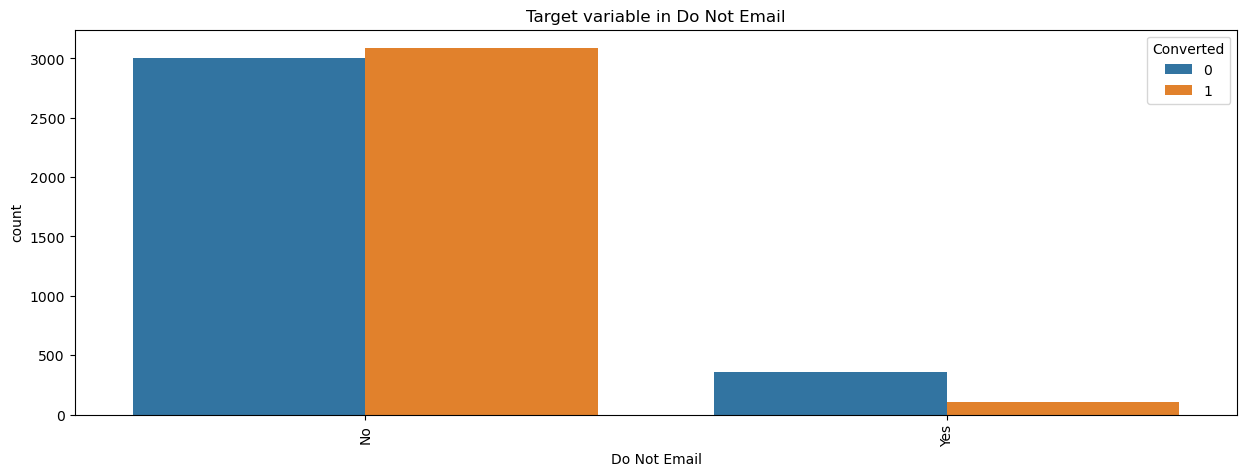

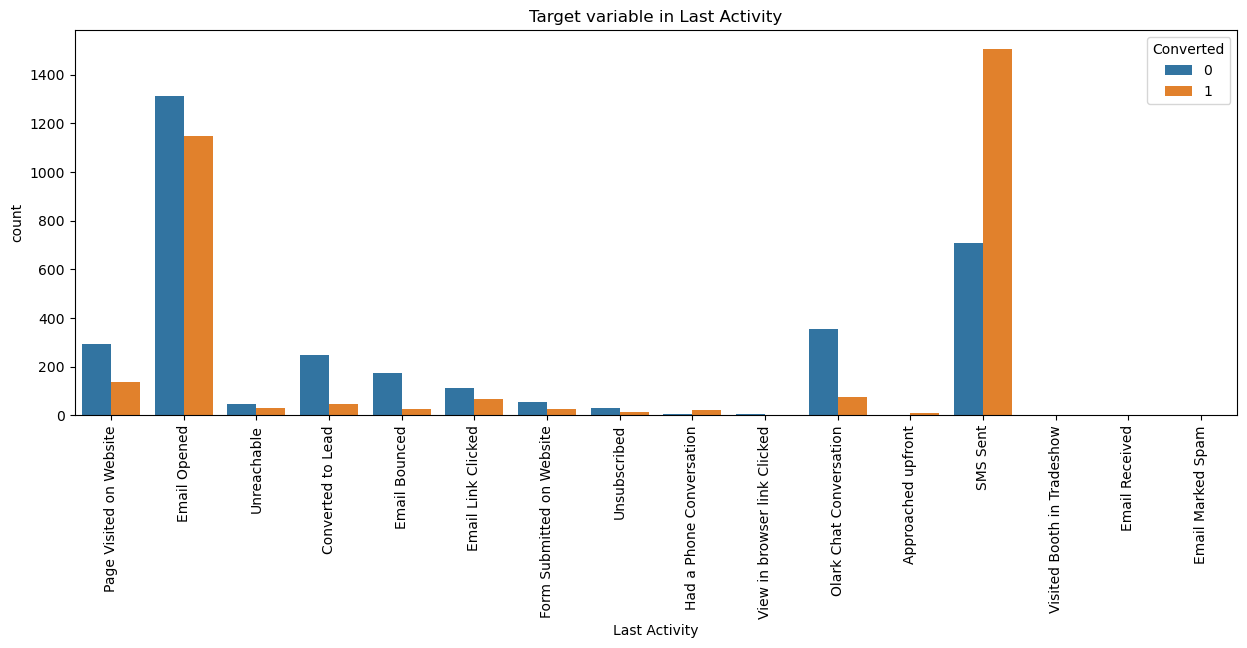

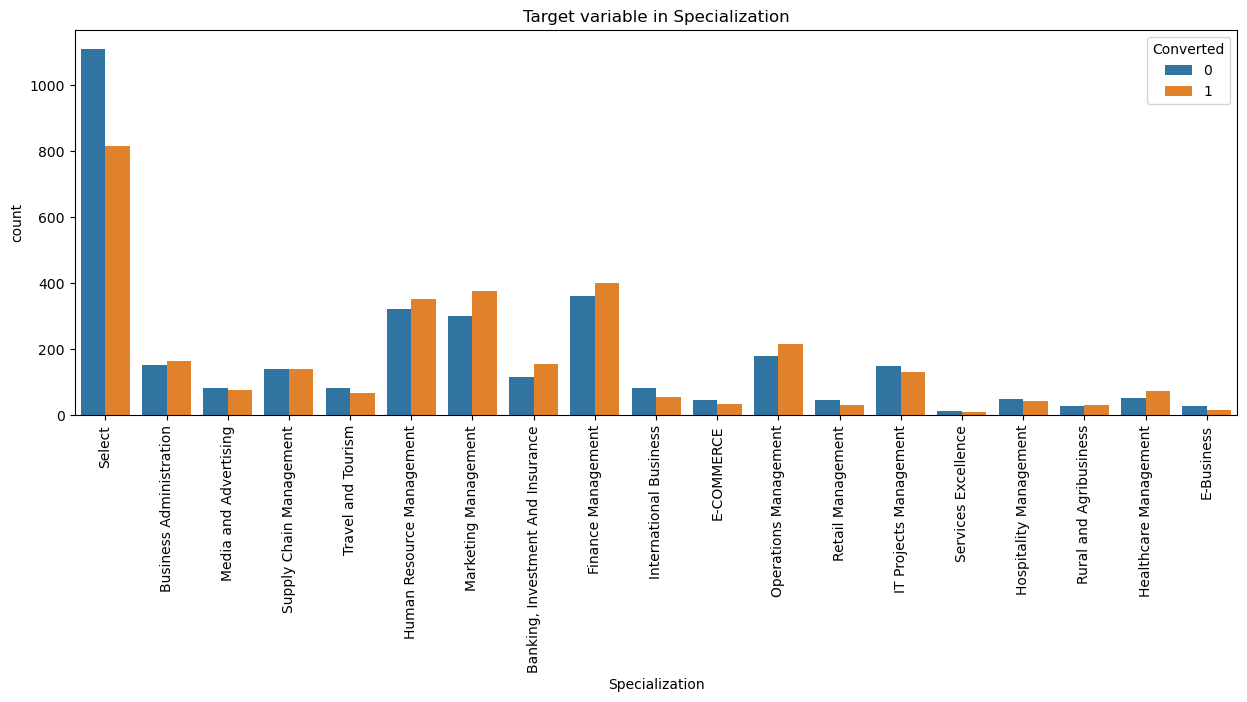

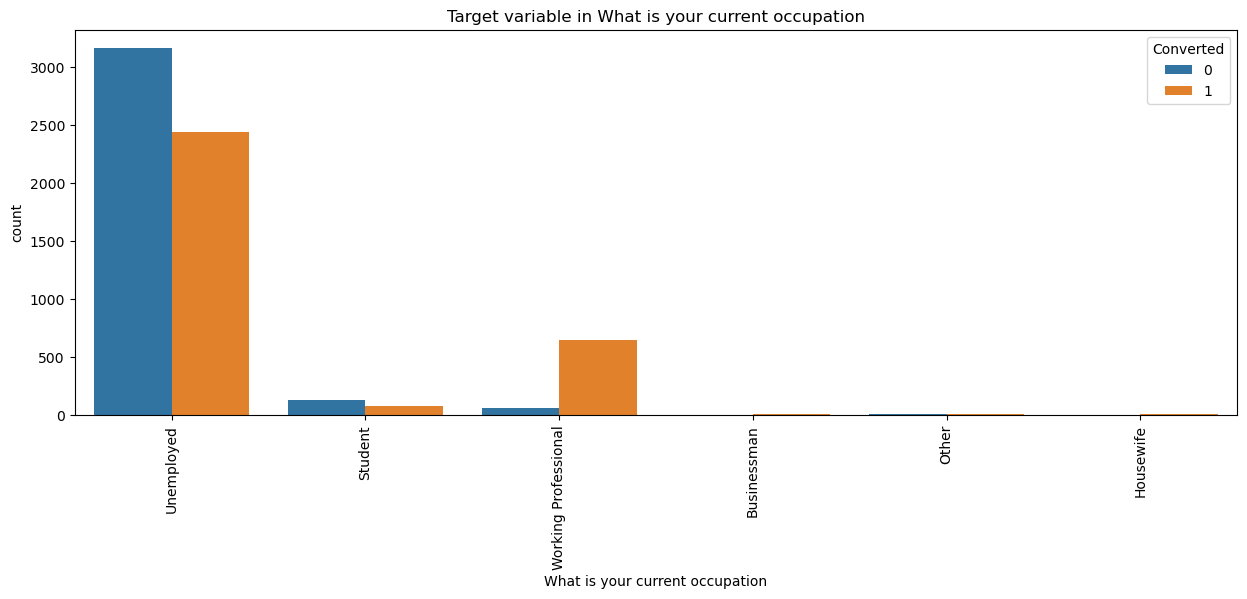

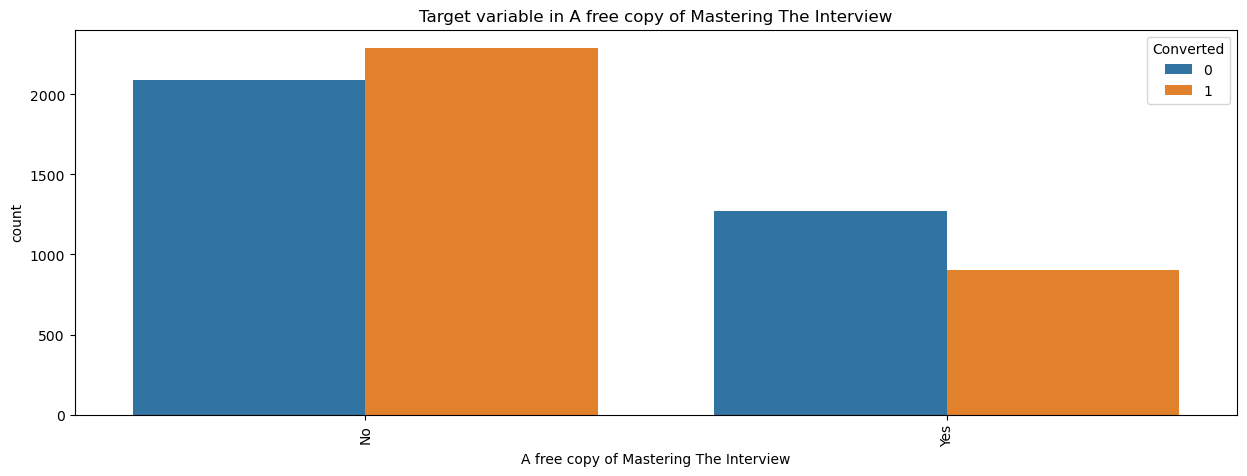

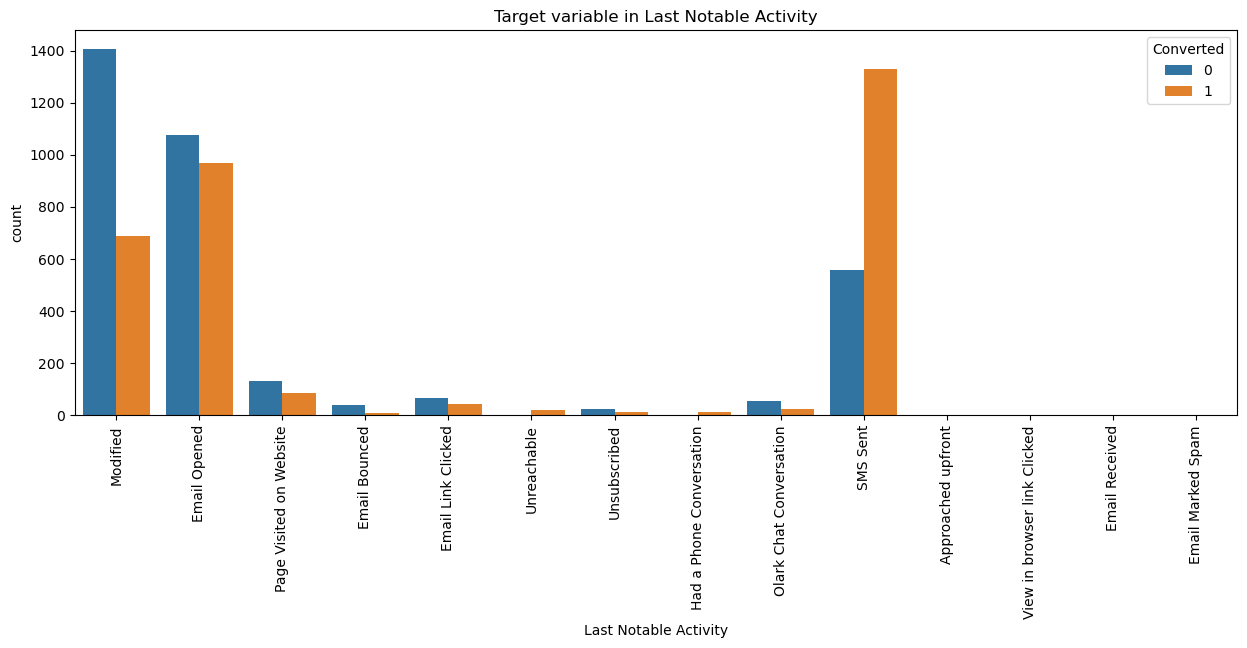

In [65]:
conv = leads.select_dtypes(include ="object").columns
leads['Converted'] = leads['Converted'].astype('category')

for i in conv:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=i, hue='Converted', data=leads)  # Use data=leads
    plt.xticks(rotation=90)
    plt.title(f'Target variable in {i}')
    plt.xlabel(i)
    plt.show()

In [66]:
# Checking the number of null values again

leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present

In [68]:
# Drop the null value rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [69]:
# Check the null values again

leads.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [70]:
# Drop the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [71]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [72]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [73]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [75]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough.

In [77]:
# Let's look at the dataset again

leads.head()

Prospect ID  Lead Number              Lead Origin     Lead Source  \
0  1.610427e+38       660737                      API      Olark Chat   
1  5.603081e+37       660728                      API  Organic Search   
2  1.871344e+38       660727  Landing Page Submission  Direct Traffic   
3  1.696257e+37       660719  Landing Page Submission  Direct Traffic   
4  6.691293e+37       660681  Landing Page Submission          Google   

  Do Not Email Converted  TotalVisits  Total Time Spent on Website  \
0           No         0          0.0                            0   
1           No         0          5.0                          674   
2           No         1          2.0                         1532   
3           No         0          1.0                          305   
4           No         1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Select   
1                   2.5             Email Opened                   Select   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [79]:
# Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, 
# so it's best that we drop these two variables.
leads.drop(['Prospect ID', 'Lead Number'], axis= 1, inplace=True)

In [80]:
leads.head()

Lead Origin     Lead Source Do Not Email Converted  \
0                      API      Olark Chat           No         0   
1                      API  Organic Search           No         0   
2  Landing Page Submission  Direct Traffic           No         1   
3  Landing Page Submission  Direct Traffic           No         0   
4  Landing Page Submission          Google           No         1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

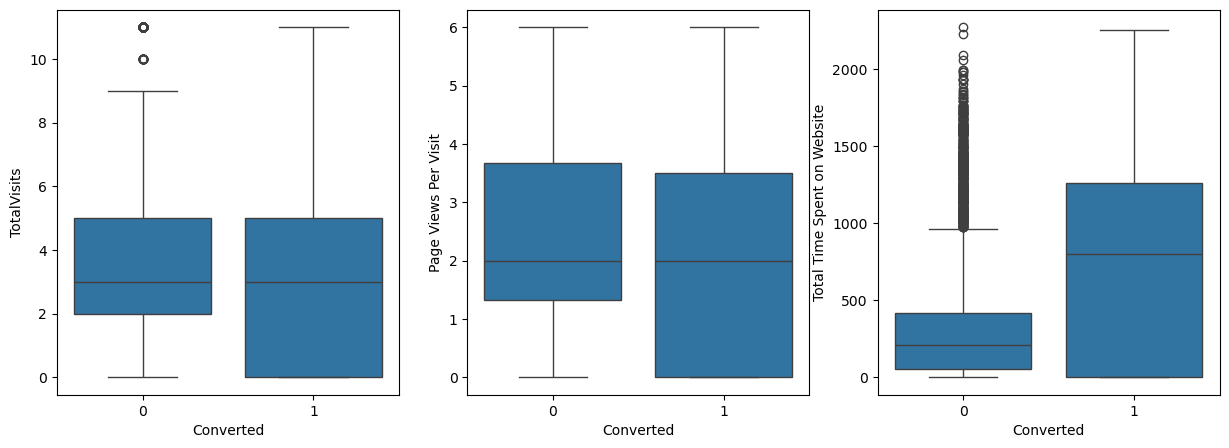

In [81]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

### Dummy variable creation

The next step is to dealing with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [84]:
# Check the columns which are of type 'object'

temp = leads.select_dtypes(include=['object'])
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [85]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True,dtype='int')

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [86]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix='Specialization')
dummy_spl = dummy_spl.drop('Specialization_Select', axis=1)  # Specify axis=1 explicitly

# Concatenate the dummy variables back to the original DataFrame
leads = pd.concat([leads, dummy_spl], axis=1)

In [87]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [88]:
# Let's take a look at the dataset again

leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0          0.0                            0                   0.0   
1         0          5.0                          674                   2.5   
2         1          2.0                         1532                   2.0   
3         0          1.0                          305                   1.0   
4         1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2              

In [89]:
leads.shape

(6373, 75)

### Test-Train Split

The next step is to spliting the dataset into training an testing sets.

In [91]:
# Import the required library

from sklearn.model_selection import train_test_split

In [92]:
# Put all the feature variables in X

X = leads.drop(['Converted'], axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3       

In [93]:
# Put the target variable in y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: category
Categories (2, int64): [0, 1]

In [94]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [95]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 74)
y_train Size (4461,)


### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [97]:
# Importing the 'MinMax scaler' Library
from sklearn.preprocessing import MinMaxScaler

In [98]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.363636                     0.029489              0.333333   
218      0.363636                     0.082306              0.666667   
4171     0.545455                     0.034331              1.000000   
4037     0.000000                     0.000000              0.000000   
3660     0.000000                     0.000000              0.000000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
8003                     0                   0                      0   
218                      0                   0                      0   
4171                     0                   0                      0   
4037                     0                   0                      0   
3660                     0                   0                      0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
8003                       0                           0   
218                        0                           0   
4171                       0                           0   
4037                       1                           0   
3660                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
8003                              0                          0   
218                               0                          0   
4171                              0                          0   
4037                              0                          0   
3660                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
8003                      0                           0   
218                       0                           0   
4171                      0                           0   
4037                      0                           0   
3660                      1                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
8003                         0                    0   
218                          0                    0   
4171                         0                    0   
4037                         0                    0   
3660                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
8003                             0                 0                    0   
218                              0                 0                    0   
4171                             0                 0                    0   
4037                             0                 0                    0   
3660                             0                 0                    0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
8003                 0                                0   
218                  0                                0   
4171                 0                                0   
4037                 0                                0   
3660                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
8

### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

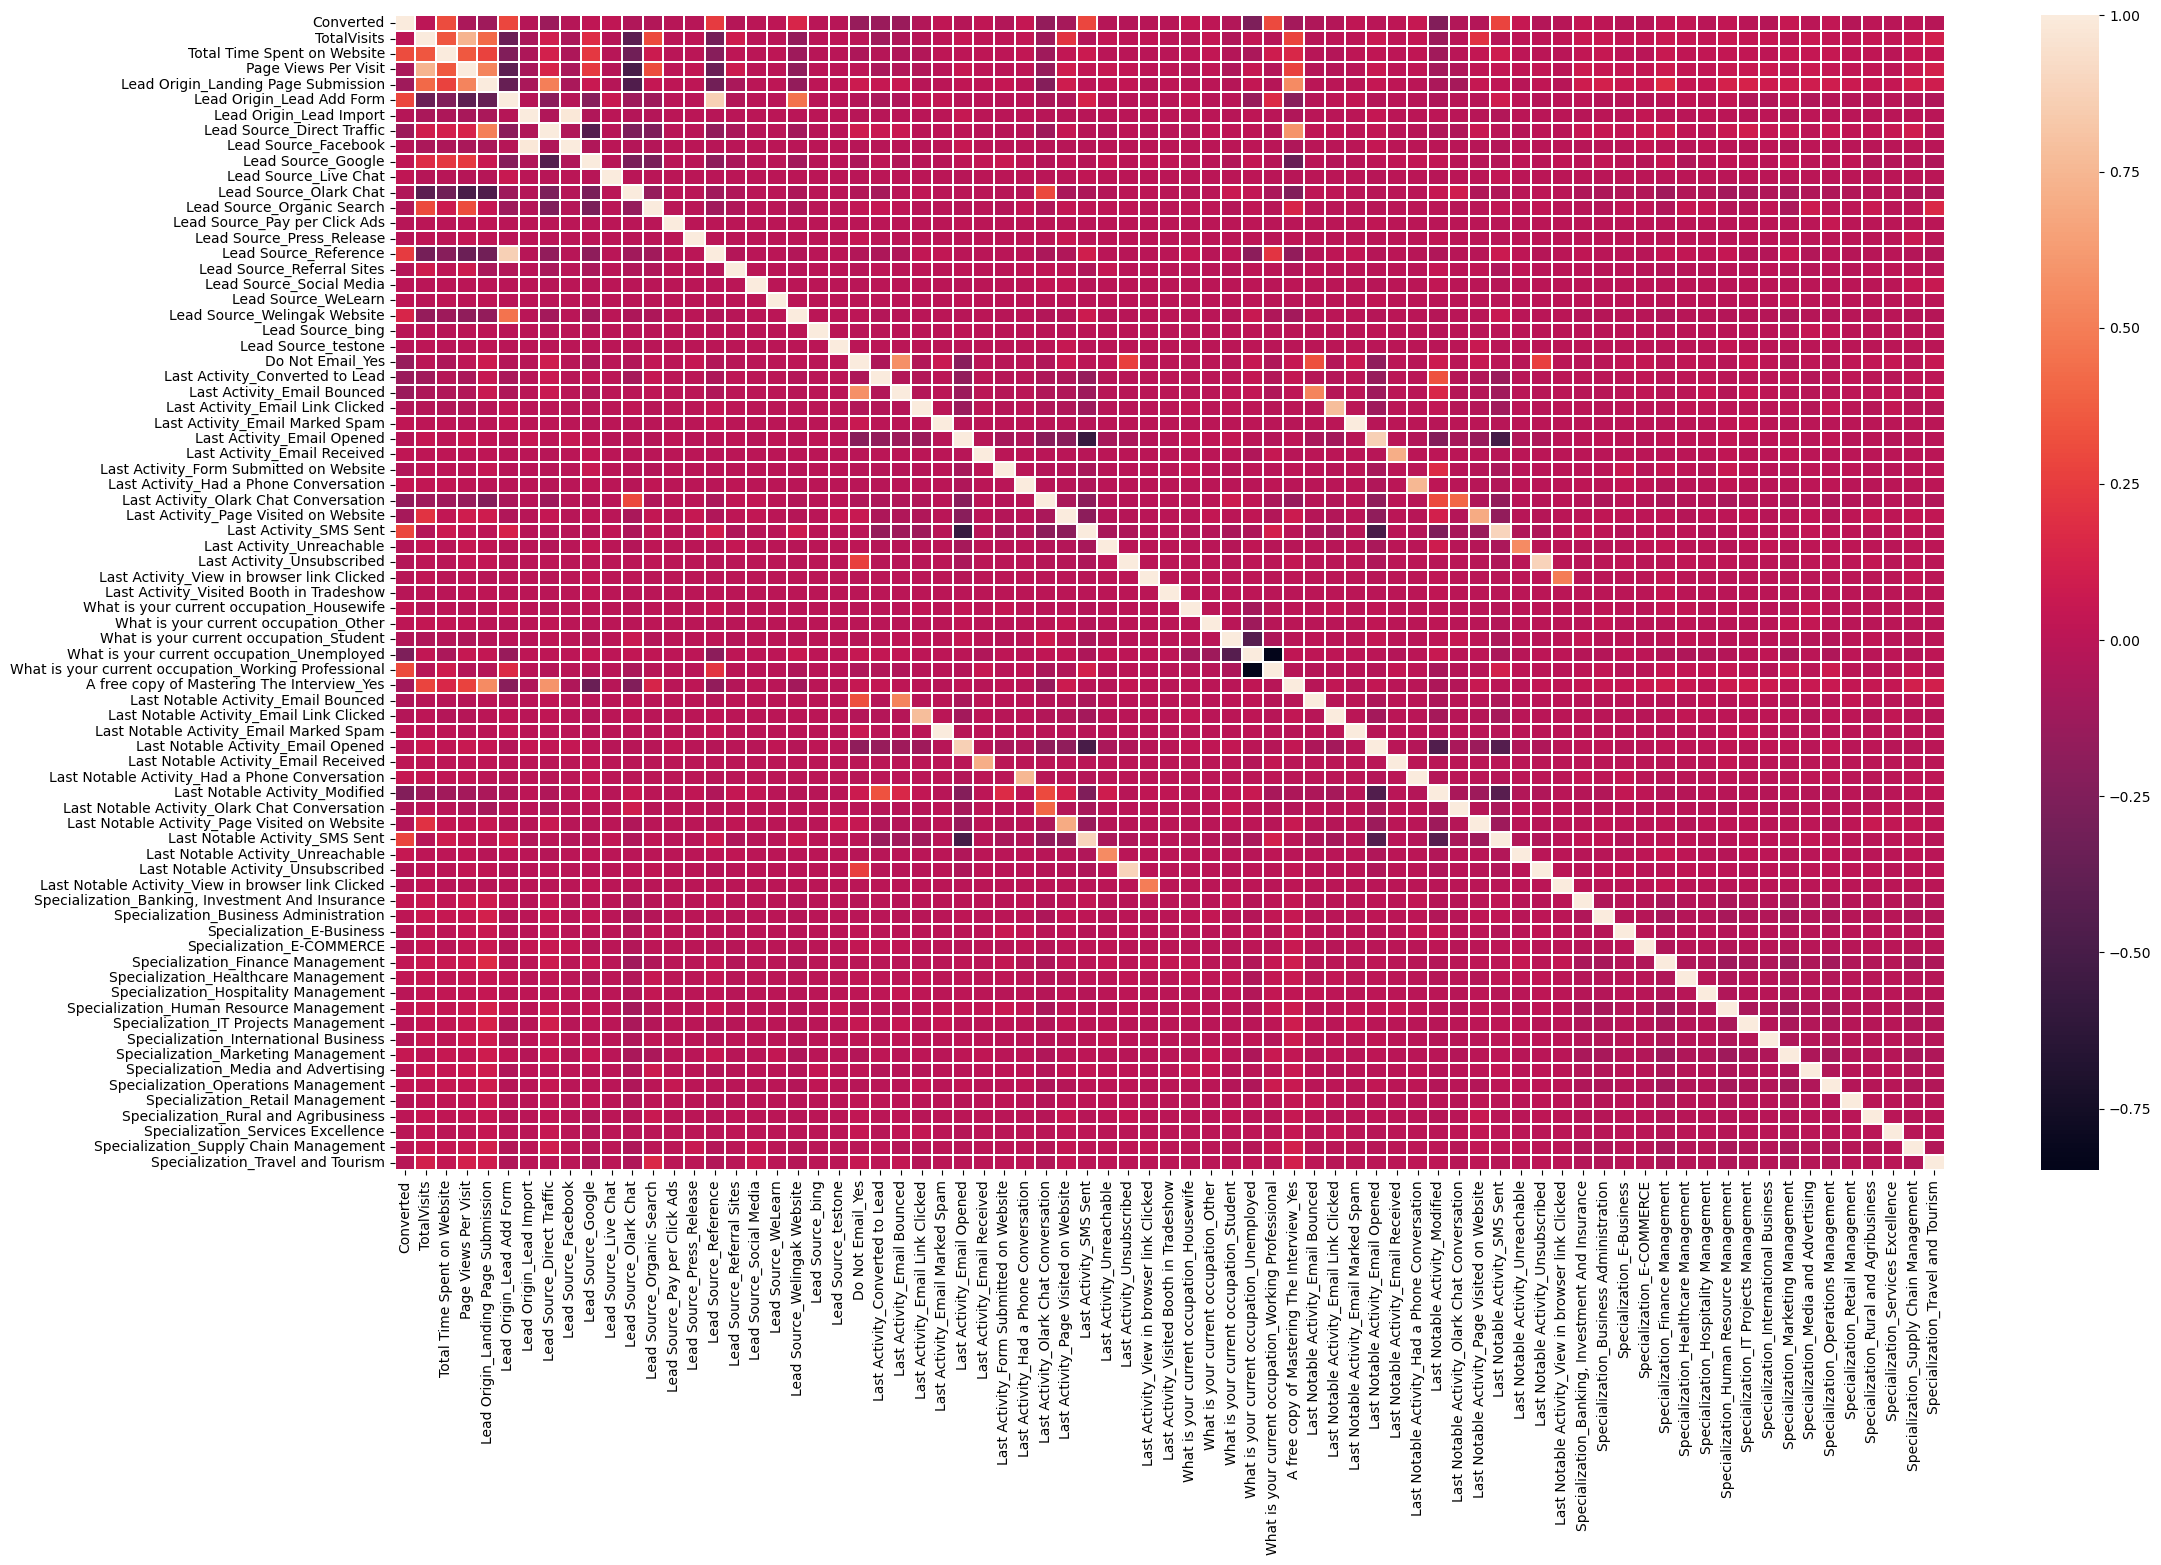

In [100]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr(),linewidths=0.1)
plt.show()

## Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [102]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [103]:
# Importing the 'RFE' and select 15 variables

rfe = RFE(estimator=logreg, n_features_to_select=15)  # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [104]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 44),
 ('Lead Source_Press_Release', False, 54),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 36),
 ('Lead Source_testone', False, 42),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 26),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link C

In [105]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [107]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [108]:
# Importing 'statsmodels'

import statsmodels.api as sm

### Model 1

In [110]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.6
Date:                Fri, 17 Jan 2025   Deviance:                       4133.1
Time:                        15:01:56   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2751      0.599     -2.130      0.033      -2.449      -0.102
TotalVisits                                              1.0671      0.179      5.975      0.000       0.717       1.417
Total Time Spent on Website                              4.3999      0.186     23.710      0.000       4.036       4.764
Lead Origin_Lead Add Form                                3.1513      1.193      2.642      0.008       0.813       5.489
Lead Source_Olark Chat                                   1.6466      0.132     12.490      0.000       1.388       1.905
Lead Source_Reference                                    1.2970      1.215      1.068      0.286      -1.084       3.678
Lead Source_Welingak Website                             3.4098      1.558      2.188      0.029       0.355       6.464
Do Not Email_Yes                                        -1.4681      0.193     -7.612      0.000      -1.846      -1.090
Last Activity_Had a Phone Conversation                   1.0208      0.986      1.035      0.301      -0.912       2.954
Last Activity_SMS Sent                                   1.1825      0.082     14.342      0.000       1.021       1.344
What is your current occupation_Housewife               22.7569   2.44e+04      0.001      0.999   -4.77e+04    4.78e+04
What is your current occupation_Student                 -1.0930      0.626     -1.746      0.081      -2.320       0.134
What is your current occupation_Unemployed              -1.2751      0.589     -2.163      0.031      -2.430      -0.120
What is your current occupation_Working Professional     1.3340      0.619      2.156      0.031       0.121       2.547
Last Notable Activity_Had a Phone Conversation          23.1263   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
Last Notable Activity_Unreachable                        2.7797      0.809      3.437      0.001       1.194       4.365
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

### Checking `VIF`

In [113]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           Lead Origin_Lead Add Form  84.30
4                               Lead Source_Reference  65.19
5                        Lead Source_Welingak Website  20.03
11         What is your current occupation_Unemployed   5.34
0                                         TotalVisits   3.50
7              Last Activity_Had a Phone Conversation   2.44
13     Last Notable Activity_Had a Phone Conversation   2.43
1                         Total Time Spent on Website   2.42
12  What is your current occupation_Working Profes...   1.78
3                              Lead Source_Olark Chat   1.65
8                              Last Activity_SMS Sent   1.59
10            What is your current occupation_Student   1.15
6                                    Do Not Email_Yes   1.09
9           What is your current occupation_Housewife   1.01
14                  Last Notable Activity_Unreachable   1.01

VIFs seem to be in a decent range except for three variables.

Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [116]:
# VIFs seem to be in a decent range except for three variables. 

# Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.
X_train.drop('Lead Source_Reference', axis=1, inplace=True)

### Model 2

In [118]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.0
Date:                Fri, 17 Jan 2025   Deviance:                       4134.1
Time:                        15:01:57   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3676
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2747      0.599     -2.129      0.033      -2.448      -0.101
TotalVisits                                              1.0671      0.179      5.975      0.000       0.717       1.417
Total Time Spent on Website                              4.4000      0.186     23.710      0.000       4.036       4.764
Lead Origin_Lead Add Form                                4.4091      0.264     16.716      0.000       3.892       4.926
Lead Source_Olark Chat                                   1.6466      0.132     12.489      0.000       1.388       1.905
Lead Source_Welingak Website                             2.1519      1.037      2.076      0.038       0.120       4.184
Do Not Email_Yes                                        -1.4664      0.193     -7.609      0.000      -1.844      -1.089
Last Activity_Had a Phone Conversation                   1.0208      0.986      1.035      0.301      -0.912       2.954
Last Activity_SMS Sent                                   1.1825      0.082     14.342      0.000       1.021       1.344
What is your current occupation_Housewife               22.7588   2.44e+04      0.001      0.999   -4.78e+04    4.78e+04
What is your current occupation_Student                 -1.0922      0.626     -1.745      0.081      -2.319       0.134
What is your current occupation_Unemployed              -1.2757      0.589     -2.165      0.030      -2.431      -0.121
What is your current occupation_Working Professional     1.3345      0.619      2.157      0.031       0.122       2.547
Last Notable Activity_Had a Phone Conversation          23.1266   2.08e+04      0.001      0.999   -4.06e+04    4.07e+04
Last Notable Activity_Unreachable                        2.7801      0.809      3.437      0.001       1.195       4.365
========================================================================================================================
"""

### Checking `VIF`

In [120]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  5.34
0                                         TotalVisits  3.50
6              Last Activity_Had a Phone Conversation  2.44
12     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.42
2                           Lead Origin_Lead Add Form  1.88
11  What is your current occupation_Working Profes...  1.78
3                              Lead Source_Olark Chat  1.65
7                              Last Activity_SMS Sent  1.59
4                        Lead Source_Welingak Website  1.33
9             What is your current occupation_Student  1.15
5                                    Do Not Email_Yes  1.09
8           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.01

The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Last Notable Activity_Had a Phone Conversation`.

In [122]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model 3

In [124]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.8
Date:                Fri, 17 Jan 2025   Deviance:                       4139.6
Time:                        15:01:57   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3668
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2770      0.598     -2.134      0.033      -2.450      -0.104
TotalVisits                                              1.0747      0.178      6.025      0.000       0.725       1.424
Total Time Spent on Website                              4.3928      0.185     23.686      0.000       4.029       4.756
Lead Origin_Lead Add Form                                4.4099      0.264     16.720      0.000       3.893       4.927
Lead Source_Olark Chat                                   1.6473      0.132     12.498      0.000       1.389       1.906
Lead Source_Welingak Website                             2.1518      1.037      2.076      0.038       0.120       4.184
Do Not Email_Yes                                        -1.4662      0.193     -7.610      0.000      -1.844      -1.089
Last Activity_Had a Phone Conversation                   2.6965      0.802      3.361      0.001       1.124       4.269
Last Activity_SMS Sent                                   1.1824      0.082     14.345      0.000       1.021       1.344
What is your current occupation_Housewife               21.7603   1.48e+04      0.001      0.999    -2.9e+04     2.9e+04
What is your current occupation_Student                 -1.0906      0.626     -1.743      0.081      -2.317       0.136
What is your current occupation_Unemployed              -1.2741      0.589     -2.163      0.031      -2.429      -0.119
What is your current occupation_Working Professional     1.3339      0.619      2.157      0.031       0.122       2.546
Last Notable Activity_Unreachable                        2.7791      0.809      3.436      0.001       1.194       4.364
========================================================================================================================
"""

Dropping the `What is your current occupation_Housewife` as having high P value

In [126]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

### Model 4

In [128]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.2
Date:                Fri, 17 Jan 2025   Deviance:                       4144.4
Time:                        15:01:57   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3661
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6925      0.555     -1.248      0.212      -1.780       0.395
TotalVisits                                              1.0592      0.178      5.944      0.000       0.710       1.408
Total Time Spent on Website                              4.3903      0.185     23.683      0.000       4.027       4.754
Lead Origin_Lead Add Form                                4.4047      0.264     16.708      0.000       3.888       4.921
Lead Source_Olark Chat                                   1.6396      0.132     12.453      0.000       1.382       1.898
Lead Source_Welingak Website                             2.1503      1.037      2.074      0.038       0.118       4.182
Do Not Email_Yes                                        -1.4693      0.193     -7.616      0.000      -1.847      -1.091
Last Activity_Had a Phone Conversation                   2.6977      0.802      3.363      0.001       1.125       4.270
Last Activity_SMS Sent                                   1.1820      0.082     14.342      0.000       1.020       1.343
What is your current occupation_Student                 -1.6678      0.587     -2.843      0.004      -2.817      -0.518
What is your current occupation_Unemployed              -1.8511      0.548     -3.381      0.001      -2.924      -0.778
What is your current occupation_Working Professional     0.7564      0.579      1.307      0.191      -0.378       1.891
Last Notable Activity_Unreachable                        2.7756      0.809      3.431      0.001       1.190       4.361
========================================================================================================================
"""

Droppint hre  `What is your current occupation_Working Professional` as having high P value

In [130]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

### Model 5

In [132]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.0
Date:                Fri, 17 Jan 2025   Deviance:                       4146.0
Time:                        15:01:57   Pearson chi2:                 4.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3659
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0059      0.203     -0.029      0.977      -0.403       0.391
TotalVisits                                    1.0516      0.178      5.903      0.000       0.702       1.401
Total Time Spent on Website                    4.3906      0.185     23.683      0.000       4.027       4.754
Lead Origin_Lead Add Form                      4.4031      0.264     16.706      0.000       3.887       4.920
Lead Source_Olark Chat                         1.6382      0.132     12.449      0.000       1.380       1.896
Lead Source_Welingak Website                   2.1487      1.037      2.073      0.038       0.117       4.181
Do Not Email_Yes                              -1.4668      0.193     -7.606      0.000      -1.845      -1.089
Last Activity_Had a Phone Conversation         2.7016      0.802      3.369      0.001       1.130       4.273
Last Activity_SMS Sent                         1.1854      0.082     14.403      0.000       1.024       1.347
What is your current occupation_Student       -2.3526      0.282     -8.351      0.000      -2.905      -1.800
What is your current occupation_Unemployed    -2.5364      0.186    -13.635      0.000      -2.901      -2.172
Last Notable Activity_Unreachable              2.7766      0.809      3.432      0.001       1.191       4.362
==============================================================================================================
"""

#### Checking final VIF

In [134]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   What is your current occupation_Unemployed  3.62
0                                  TotalVisits  2.90
1                  Total Time Spent on Website  2.16
7                       Last Activity_SMS Sent  1.52
2                    Lead Origin_Lead Add Form  1.50
3                       Lead Source_Olark Chat  1.43
4                 Lead Source_Welingak Website  1.31
8      What is your current occupation_Student  1.09
5                             Do Not Email_Yes  1.08
6       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01

## Model Evaluation 

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [136]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.300488
218     0.142035
4171    0.139683
4037    0.288207
3660    0.954619
207     0.202227
2044    0.163267
6411    0.950789
6498    0.071018
2085    0.982181
dtype: float64

In [137]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30048823, 0.14203515, 0.13968297, 0.28820658, 0.95461934,
       0.2022272 , 0.16326739, 0.95078903, 0.07101843, 0.9821809 ])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [139]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0         0         0.300488
1         0         0.142035
2         1         0.139683
3         1         0.288207
4         1         0.954619

### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [141]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0         0         0.300488          0
1         0         0.142035          0
2         1         0.139683          0
3         1         0.288207          0
4         1         0.954619          1

Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [143]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

### Creating the `Confusion matrix`

In [145]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1916  396]
 [ 571 1578]]


In [146]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [147]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7832324590898901


In [148]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.7342950209399721

In [150]:
# Calculating the 'specificity'

TN/(TN+FP)

0.828719723183391

### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [152]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

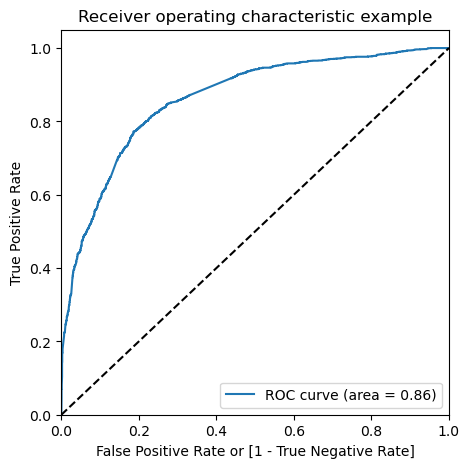

In [154]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [156]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0         0         0.300488          0    1    1    1    1    0    0    0   
1         0         0.142035          0    1    1    0    0    0    0    0   
2         1         0.139683          0    1    1    0    0    0    0    0   
3         1         0.288207          0    1    1    1    0    0    0    0   
4         1         0.954619          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [157]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.540013  0.990693  0.121107
0.2   0.2  0.694015  0.946952  0.458910
0.3   0.3  0.768438  0.866450  0.677336
0.4   0.4  0.790182  0.809214  0.772491
0.5   0.5  0.783232  0.734295  0.828720
0.6   0.6  0.758574  0.622150  0.885381
0.7   0.7  0.736382  0.543974  0.915225
0.8   0.8  0.711948  0.456491  0.949394
0.9   0.9  0.644923  0.282457  0.981834


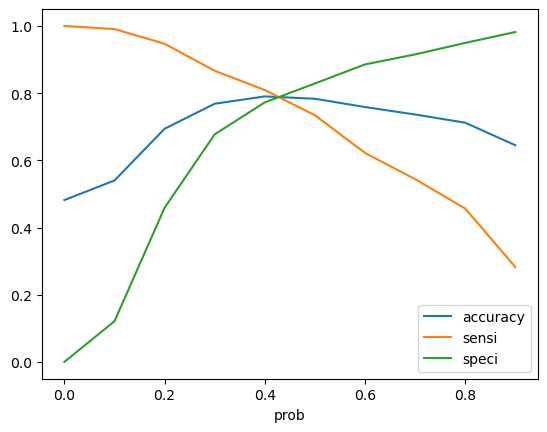

In [158]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around `0.42`, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [160]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0         0         0.300488          0    1    1    1    1    0    0    0   
1         0         0.142035          0    1    1    0    0    0    0    0   
2         1         0.139683          0    1    1    0    0    0    0    0   
3         1         0.288207          0    1    1    1    0    0    0    0   
4         1         0.954619          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [161]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7899574086527684

In [162]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1820,  492],
       [ 445, 1704]])

In [163]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Calculate Sensitivity

TP/(TP+FN)

0.7929269427640763

In [165]:
# Calculate Specificity

TN/(TN+FP)

0.78719723183391

This cutoff point seems good to go!

## Making Predictions on the Test Set
Let's now make predicitons on the test set

In [168]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [169]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771     0.000000                     0.000000                          1   
6122     0.636364                     0.029049                          0   
9202     0.363636                     0.416813                          0   
6570     0.272727                     0.378961                          0   
2668     0.727273                     0.395246                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [170]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [171]:
# Check X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.636364                     0.029049   
9202    1.0     0.363636                     0.416813   
6570    1.0     0.272727                     0.378961   
2668    1.0     0.727273                     0.395246   
...     ...          ...                          ...   
5828    1.0     0.272727                     0.027289   
6583    1.0     0.272727                     0.152289   
5531    1.0     1.000000                     0.702025   
3056    1.0     0.272727                     0.417694   
4088    1.0     0.454545                     0.530370   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   
...                         ...                     ...   
5828                          0                       0   
6583                          0                       0   
5531                          0                       0   
3056                          0                       0   
4088                          0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  Do Not Email_Yes  \
4771                      1                             0                 0   
6122                      0                             0                 0   
9202                      0                             0                 0   
6570                      0                             0                 1   
2668                      0                             0                 0   
...                     ...                           ...               ...   
5828                      0                             0                 0   
6583                      0                             0                 0   
5531                      0                             0                 0   
3056                      0                             0                 1   
4088                      0                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   
...                                      ...                     ...   
5828                                       0                       1   
6583                                       0                       1   
5531                                       0                       0   
3056                                       0                       1   
4088                                       0                       0   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   
...                                         ...   
5828                                          0   
6583                                          0   
5531                                          0   
3056                                          0   
4088                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                  

In [172]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], axis=1, 
                                inplace = True)

In [173]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [174]:
y_test_pred[:10]

4771    0.996251
6122    0.148614
9202    0.701743
6570    0.294637
2668    0.758290
4233    0.794279
3368    0.678039
9091    0.525917
5972    0.263010
3631    0.792749
dtype: float64

In [175]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [176]:
# Let's see the head

y_pred_1.head()

0
4771  0.996251
6122  0.148614
9202  0.701743
6570  0.294637
2668  0.758290

In [177]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [178]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [179]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [180]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0         1  0.996251
1         0  0.148614
2         0  0.701743
3         1  0.294637
4         1  0.758290

In [181]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [182]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0         1         0.996251
1         0         0.148614
2         0         0.701743
3         1         0.294637
4         1         0.758290

In [183]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [184]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0         1         0.996251                1
1         0         0.148614                0
2         0         0.701743                1
3         1         0.294637                0
4         1         0.758290                1

In [185]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7887029288702929

In [186]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[784, 212],
       [192, 724]])

In [187]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [188]:
# Calculate sensitivity
TP / float(TP+FN)

0.7903930131004366

In [189]:
# Calculate specificity
TN / float(TN+FP)

0.7871485943775101

### Precision-Recall View

Let's now also build the training model using the precision-recall view

In [191]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1916,  396],
       [ 571, 1578]])

 #### Precision = 
         TP / TP + FP

In [193]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7993920972644377

#### Recall = 
    TP / TP + FN

In [195]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7342950209399721

### Precision and recall tradeoff

Importing the `Precision recall curve` library

In [197]:
from sklearn.metrics import precision_recall_curve

In [198]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: category
 Categories (2, int64): [0, 1],
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [199]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

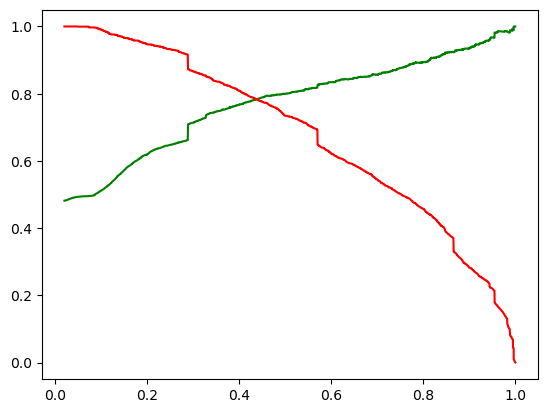

In [200]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [201]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0         0         0.300488          0    1    1    1    1    0    0    0   
1         0         0.142035          0    1    1    0    0    0    0    0   
2         1         0.139683          0    1    1    0    0    0    0    0   
3         1         0.288207          0    1    1    1    0    0    0    0   
4         1         0.954619          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [202]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7921990585070612

In [203]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1851,  461],
       [ 466, 1683]])

In [204]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Precision

In [206]:
# Calculate Precision

TP/(TP+FP)

0.784981343283582

### Recall

In [208]:
# Calculate Recall

TP/(TP+FN)

0.7831549557933922

This cutoff point seems good to go!

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [211]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [212]:
y_test_pred[:10]

4771    0.996251
6122    0.148614
9202    0.701743
6570    0.294637
2668    0.758290
4233    0.794279
3368    0.678039
9091    0.525917
5972    0.263010
3631    0.792749
dtype: float64

In [213]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [214]:
# Let's see the head

y_pred_1.head()

0
4771  0.996251
6122  0.148614
9202  0.701743
6570  0.294637
2668  0.758290

In [215]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [216]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [217]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [218]:
# Checking the 'y_pred_final'

y_pred_final.head()

Converted         0
0         1  0.996251
1         0  0.148614
2         0  0.701743
3         1  0.294637
4         1  0.758290

In [219]:

# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [220]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0         1         0.996251
1         0         0.148614
2         0         0.701743
3         1         0.294637
4         1         0.758290

In [221]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [222]:
# Checking y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0         1         0.996251                1
1         0         0.148614                0
2         0         0.701743                1
3         1         0.294637                0
4         1         0.758290                1

In [223]:
# Let's checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7850418410041841

In [224]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[794, 202],
       [209, 707]])

In [225]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [226]:
# Calculate Precision
print('Precision:')
TP/(TP+FP)

Precision:


0.7777777777777778

In [227]:
# Calculate Recall
print('Recall:')
TP/(TP+FN)

Recall:


0.7718340611353712

In [228]:
# Calculate sensitivity
TP / float(TP+FN)

0.7718340611353712

In [229]:
# Calculate specificity
TN / float(TN+FP)

0.7971887550200804

### Conclusion 

- We see that the conversion rate is 30-35% (close to average) for API and Landing page submission. But very low for Lead Add form and Lead import. Therefore we can intervene that we need to focus more on the leads originated from API and Landing page submission.

- We see max number of leads are generated by google / direct traffic. Max conversion ratio is by reference and welingak website.

- Leads who spent more time on website, more likely to convert.

- Most common last activity is email opened. highest rate = SMS Sent. Max are unemployed. Max conversion with working professional.
